In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('exp5.csv')
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


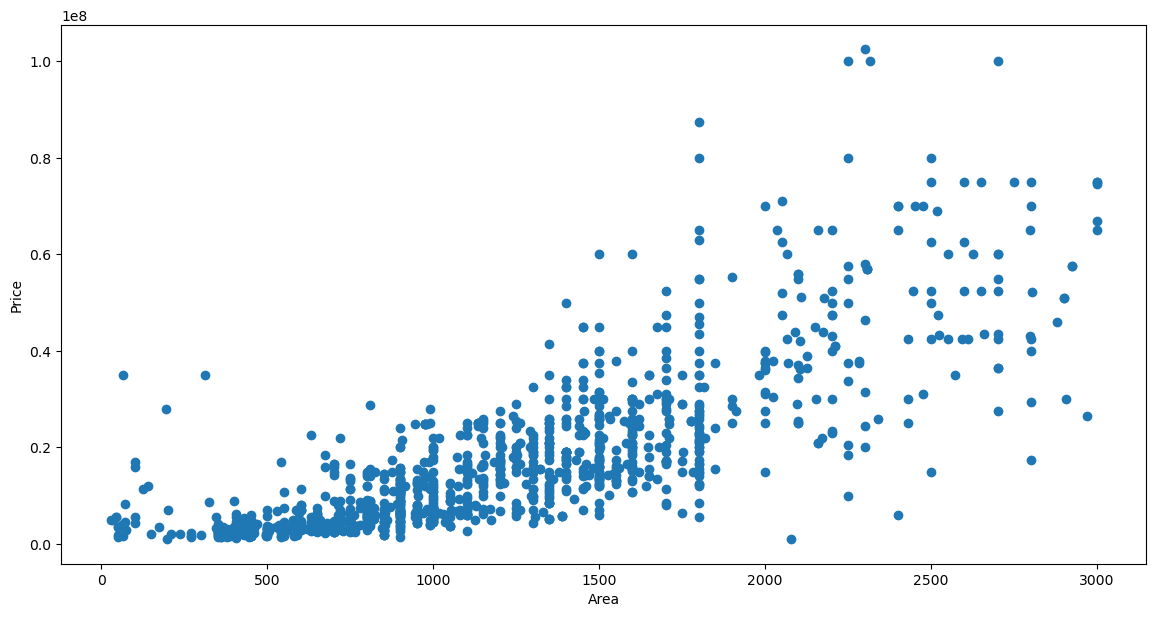

In [3]:
df.drop(df[df['Area'] > 3000].index, inplace = True)
plt.figure(figsize=(14,7))
plt.xlabel('Area')
plt.ylabel('Price')
plt.scatter(df.Area,df.Price)

In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [9]:
df['Furnishing'] = label_encoder.fit_transform(df['Furnishing'])
df['Locality'] = label_encoder.fit_transform(df['Locality'])
df['Status'] = label_encoder.fit_transform(df['Status'])
df['Transaction'] = label_encoder.fit_transform(df['Transaction'])
df['Type'] = label_encoder.fit_transform(df['Type'])
df

KeyError: 'Furnishing'

In [10]:
df1 = df.dropna()
df1

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Furnishing_Furnished,Furnishing_Semi-Furnished,Furnishing_Unfurnished,"Locality_APL Builder Floor, Greater Kailash 1",...,"Locality_Yamuna Apartment, Alaknanda","Locality_Yamuna Vihar, Shahdara","Locality_Zakir Nagar, New Friends Colony","Locality_mind. The space is airy, is well located and can be easily customized as per the needs. Prime facilities are easily accessible from this place with Government Girls Senior Secondary School No 2 (0 km ). Other key neighbourhood are B Block Market (0 km ). read more Contact Owner View Phone No. Share Feedback Owner vinod kumar",Status_Almost_ready,Status_Ready_to_move,Transaction_New_Property,Transaction_Resale,Type_Apartment,Type_Builder_Floor
1,750.0,2,2.0,1.0,5000000,6667.0,False,True,False,False,...,False,False,False,False,False,True,True,False,True,False
2,950.0,2,2.0,1.0,15500000,6667.0,True,False,False,False,...,False,False,False,False,False,True,False,True,True,False
3,600.0,2,2.0,1.0,4200000,6667.0,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
4,650.0,2,2.0,1.0,6200000,6667.0,False,True,False,False,...,False,False,False,False,False,True,True,False,False,True
5,1300.0,4,3.0,1.0,15500000,6667.0,False,True,False,False,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,1800.0,3,3.0,1.0,26000000,12916.0,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
1253,1200.0,3,3.0,1.0,16500000,12916.0,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
1255,1050.0,3,2.0,3.0,12500000,12916.0,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
1256,875.0,3,3.0,3.0,17500000,12916.0,False,True,False,False,...,False,False,False,False,False,True,True,False,False,True


In [11]:
df1.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,940.000000,940.000000,940.000000,940.000000,9.400000e+02,940.000000
mean,1202.590934,2.692553,2.443617,1.661702,1.760809e+07,14481.082979
std,637.367941,0.893801,0.964775,3.312998,1.719176e+07,18593.845532
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1667.000000
25%,750.000000,2.000000,2.000000,1.000000,5.000000e+06,6154.000000
50%,1100.000000,3.000000,2.000000,1.000000,1.250000e+07,10590.500000
75%,1600.000000,3.000000,3.000000,2.000000,2.472500e+07,17181.250000
max,3000.000000,7.000000,6.000000,39.000000,1.025000e+08,183333.000000


In [12]:
df['Per_Sqft'].isnull().sum()

237

In [13]:
df['Parking'].fillna(int(df['Parking'].mode()), inplace=True)
X= df1[['Area','BHK','Bathroom','Furnishing','Locality','Parking','Status','Transaction','Type']]
y=df1['Price']

C:\Users\sanch\AppData\Local\Temp\ipykernel_1536\1215651565.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df['Parking'].fillna(int(df['Parking'].mode()), inplace=True)


KeyError: "['Furnishing', 'Locality', 'Status', 'Transaction', 'Type'] not in index"

In [15]:
import numpy as np
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2)
linear=LinearRegression()

NameError: name 'X' is not defined

In [16]:
linear.fit(X_train,Y_train)
Y_pred = linear.predict(X_test)
print(f"Accuracy of Test Data is {round(linear.score(X_test, Y_test)*100,2)}%")
print(f"Accuracy of Training Data is {round(linear.score(X_train, Y_train)*100,2)}%")

NameError: name 'linear' is not defined

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [18]:
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))
print(mean_absolute_error(Y_test, Y_pred))

NameError: name 'Y_test' is not defined